In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from keras.callbacks import EarlyStopping

Url_Diabetes="https://raw.githubusercontent.com/oprostep/2023-spring/main/diabetes_prediction_dataset.csv"

df = pd.read_csv(Url_Diabetes)

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


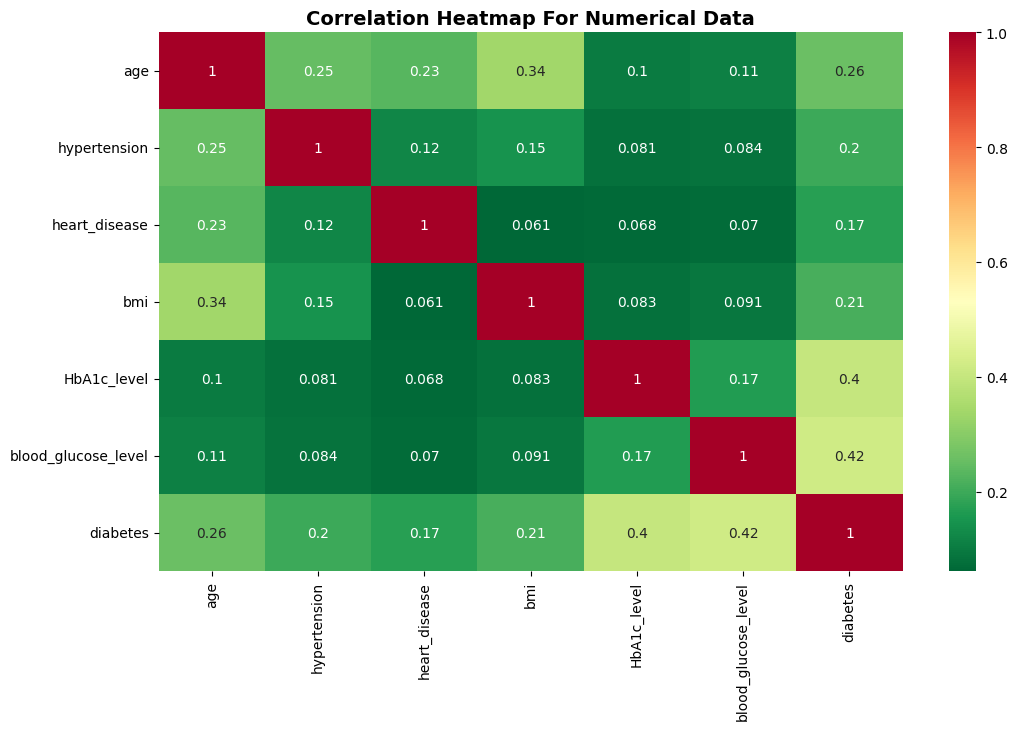

In [2]:
con_cols = [x for x in df.dtypes.index if df.dtypes[x] != 'object']
plt.figure(figsize = (12,7))
sns.heatmap(df[con_cols].corr(), annot = True, cmap = 'RdYlGn_r')
plt.title("Correlation Heatmap For Numerical Data", fontsize = '14', fontweight= 'bold')
plt.show()

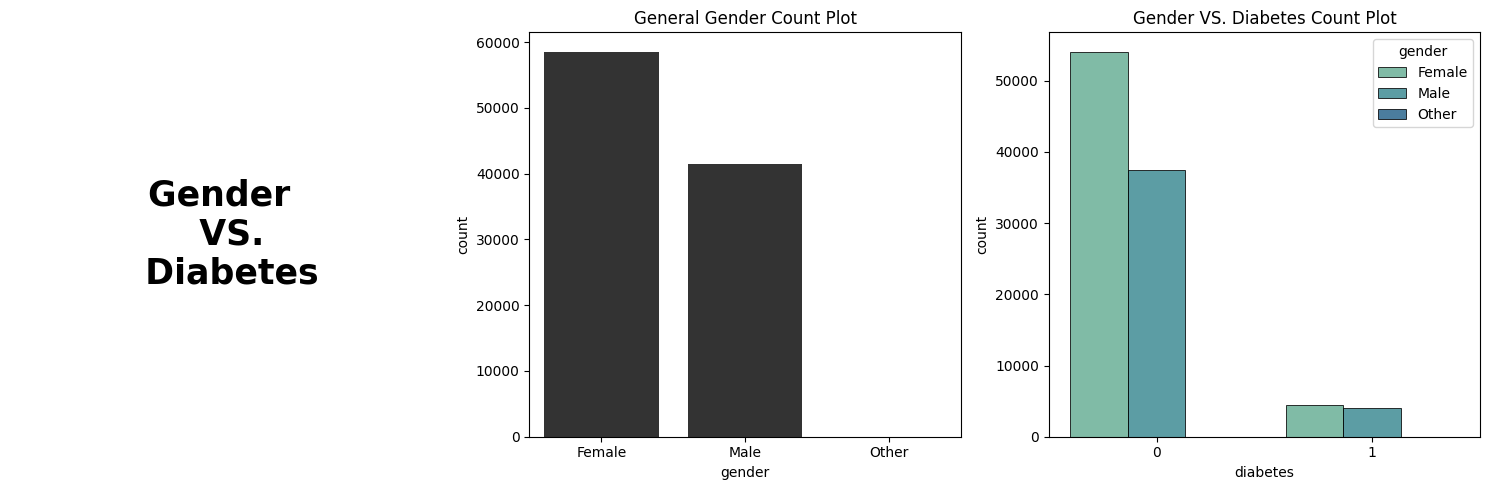

In [3]:
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Gender \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

plt.subplot(1,3, 2)

sns.countplot(x = df['gender'], color = "black",  alpha = 0.8, saturation =1)

plt.title("General Gender Count Plot")

plt.subplot(1,3, 3)
sns.countplot( x = df['diabetes'], hue = df['gender'],   palette='crest', linewidth = 0.7, alpha = 0.8, edgecolor = 'k', saturation =1)
plt.title("Gender VS. Diabetes Count Plot")

plt.tight_layout()
plt.show()

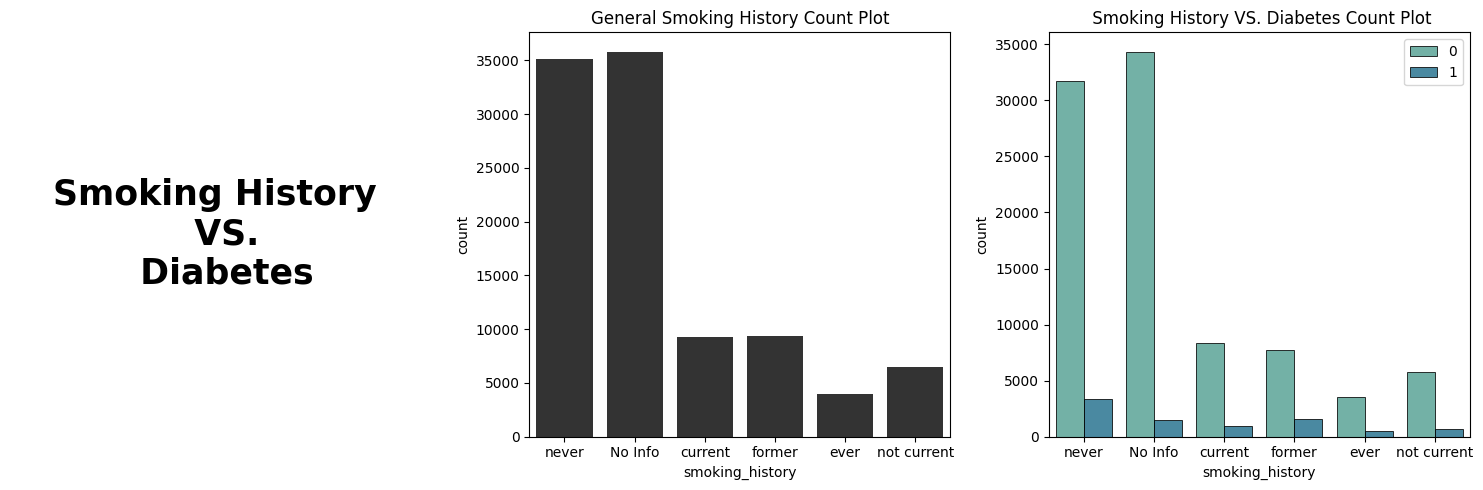

In [4]:
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Smoking History \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.set_facecolor("#97C8A7")
ax.axis('off')

plt.subplot(1,3, 2)
counts = df['smoking_history'].value_counts().reset_index().sort_values(by = 'smoking_history', ascending = False)
sns.countplot(x = 'smoking_history', data = df, color = "black", alpha = 0.8, saturation =1)
plt.title("General Smoking History Count Plot")

plt.subplot(1,3, 3)
sns.countplot( x =df['smoking_history'] , hue = df['diabetes'] ,   palette='crest', linewidth = 0.7, edgecolor = 'k', saturation =1, alpha = 0.8)
plt.title(" Smoking History VS. Diabetes Count Plot")

plt.legend()
plt.tight_layout()
plt.show()

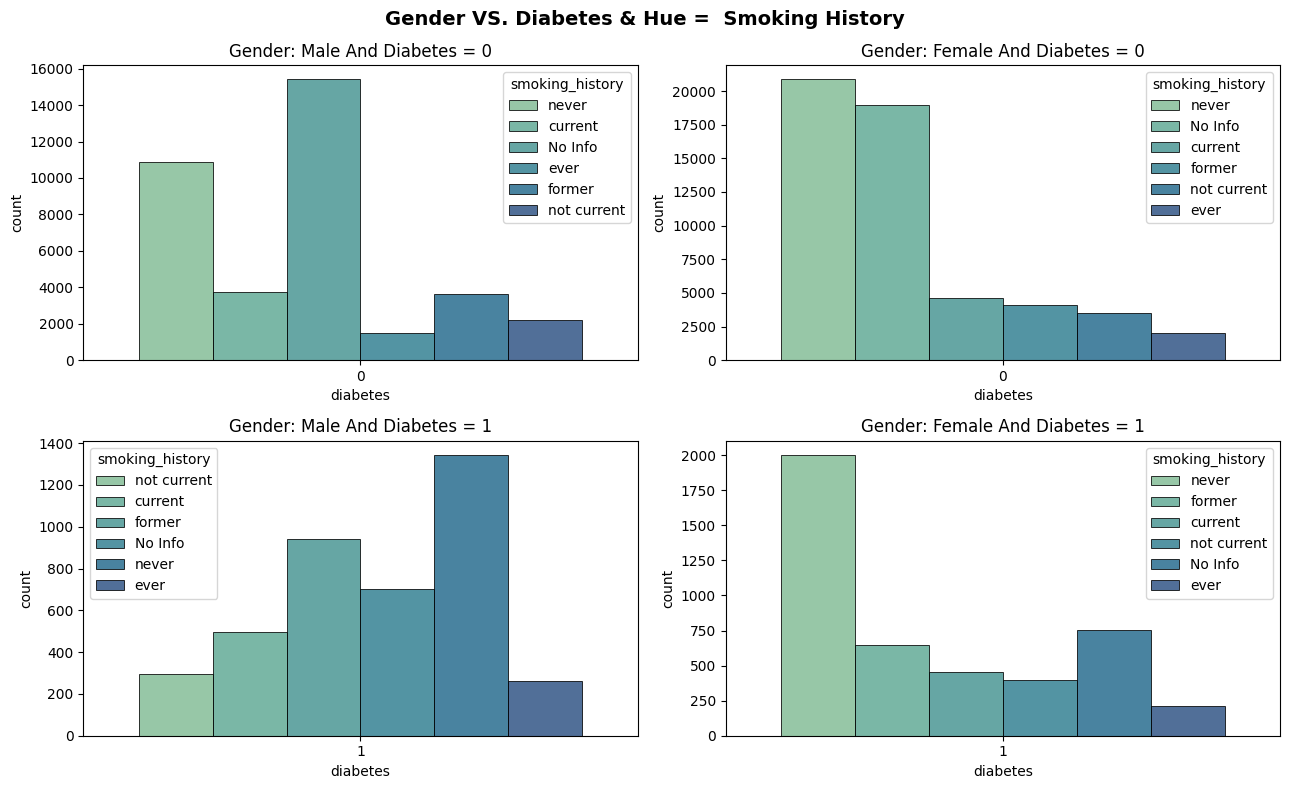

In [5]:
fig = plt.figure(figsize = (13,8))

df_male = df[(df.gender == 'Male') & (df.diabetes == 0)]
plt.subplot(2,2,1)
sns.countplot(x= df_male.diabetes, hue = df_male.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Male And Diabetes = 0")

plt.subplot(2,2,2)
df_female = df[(df.gender == 'Female') & (df.diabetes == 0)]
sns.countplot(x= df_female.diabetes, hue = df_female.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Female And Diabetes = 0")

df_male = df[(df.gender == 'Male') & (df.diabetes == 1)]
plt.subplot(2,2,3)
sns.countplot(x= df_male.diabetes, hue = df_male.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Male And Diabetes = 1")

plt.subplot(2,2,4)
df_female = df[(df.gender == 'Female') & (df.diabetes == 1)]
sns.countplot(x= df_female.diabetes, hue = df_female.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Female And Diabetes = 1")
fig.suptitle("Gender VS. Diabetes & Hue =  Smoking History", fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

In [6]:
# EDA

le = LabelEncoder()

list_str = ['gender', 'smoking_history']
for c in list_str:
    df[c] = le.fit_transform(df[c])

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [7]:
# Train test split

X = df.drop('diabetes', axis = 1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

stand = StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [8]:
# modeling

def model_fn():
    model = Sequential([
    Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])
    return model

model = model_fn()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test), callbacks=[early_stop])

Epoch 1/30
2500/2500 [==============================] - 16s 6ms/step - loss: 0.1495 - accuracy: 0.9492 - val_loss: 0.1117 - val_accuracy: 0.9618
Epoch 2/30
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1131 - accuracy: 0.9621 - val_loss: 0.0974 - val_accuracy: 0.9685
Epoch 3/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1012 - accuracy: 0.9671 - val_loss: 0.0913 - val_accuracy: 0.9704
Epoch 4/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0954 - accuracy: 0.9682 - val_loss: 0.0881 - val_accuracy: 0.9710
Epoch 5/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0919 - accuracy: 0.9693 - val_loss: 0.0874 - val_accuracy: 0.9712
Epoch 6/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0904 - accuracy: 0.9696 - val_loss: 0.0848 - val_accuracy: 0.9719
Epoch 7/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0879 - accuracy: 0.9703 - val_loss: 0.0847 - val_accurac

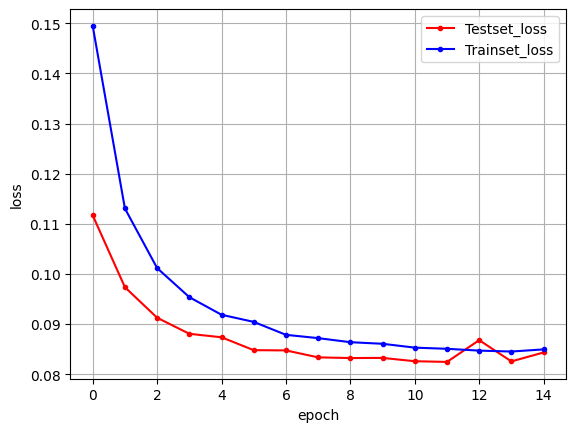

625/625 [==============================] - 2s 3ms/step - loss: 0.0843 - accuracy: 0.9712

 Test Accuracy: 0.9712


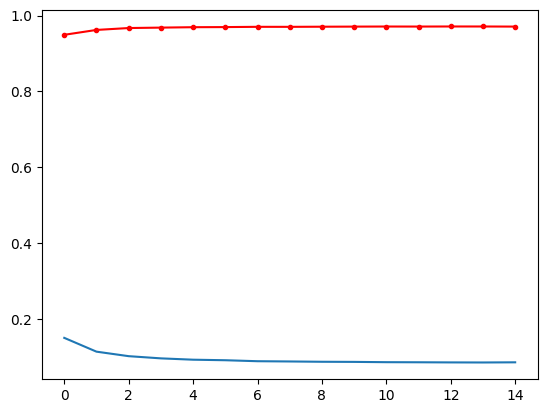

In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

y_loss = history.history['loss']
y_accu = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)
plt.plot(x_len,y_accu, marker='.', c="red")

plt.show()

In [11]:
# Set k (number of folds)
k=3

kfold = KFold(n_splits=k, shuffle=True)
acc_score = []

for train_index , test_index in kfold.split(X):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y[train_index], y[test_index]

    model = model_fn()

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
    history = model.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test), callbacks=[early_stop])
    
    accuracy = model.evaluate(X_test, y_test)[1]
    acc_score.append(accuracy)

avg_acc_score = sum(acc_score)/k

print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

Epoch 1/30
2084/2084 [==============================] - 16s 6ms/step - loss: 0.5430 - accuracy: 0.8991 - val_loss: 0.2731 - val_accuracy: 0.9170
Epoch 2/30
2084/2084 [==============================] - 7s 3ms/step - loss: 0.2824 - accuracy: 0.9140 - val_loss: 0.2608 - val_accuracy: 0.9170
Epoch 3/30
2084/2084 [==============================] - 6s 3ms/step - loss: 0.2636 - accuracy: 0.9158 - val_loss: 0.2331 - val_accuracy: 0.9202
Epoch 4/30
2084/2084 [==============================] - 5s 3ms/step - loss: 0.2441 - accuracy: 0.9220 - val_loss: 0.2228 - val_accuracy: 0.9285
Epoch 5/30
2084/2084 [==============================] - 6s 3ms/step - loss: 0.2351 - accuracy: 0.9244 - val_loss: 0.2124 - val_accuracy: 0.9318
Epoch 6/30
2084/2084 [==============================] - 7s 3ms/step - loss: 0.2227 - accuracy: 0.9254 - val_loss: 0.1907 - val_accuracy: 0.9341
Epoch 7/30
2084/2084 [==============================] - 7s 4ms/step - loss: 0.2016 - accuracy: 0.9290 - val_loss: 0.1656 - val_accuracy

Epoch 1/3
2084/2084 [==============================] - 8s 3ms/step - loss: 0.5801 - accuracy: 0.9005 - val_loss: 0.2726 - val_accuracy: 0.9129
Epoch 2/3
2084/2084 [==============================] - 6s 3ms/step - loss: 0.2714 - accuracy: 0.9160 - val_loss: 0.2476 - val_accuracy: 0.9129
Epoch 3/3
1042/1042 [==============================] - 1s 1ms/step


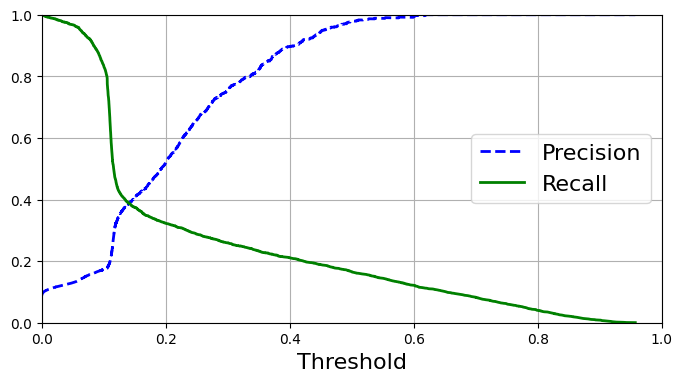

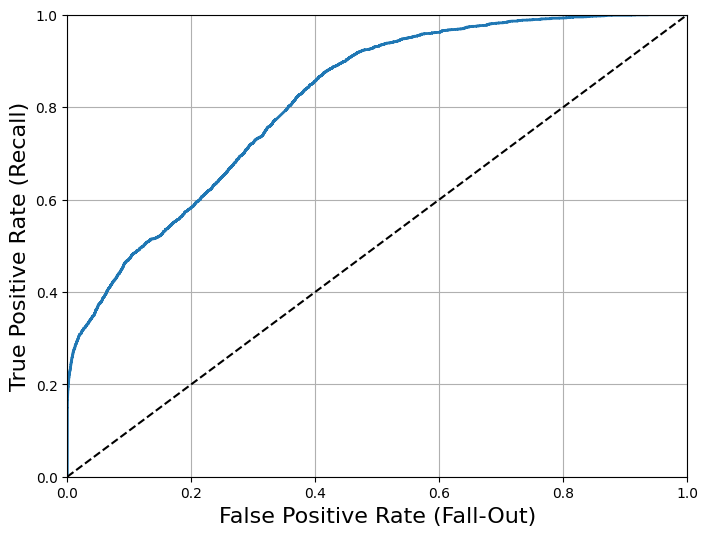

AUC: 0.8142039132218108


In [12]:
model = model_fn()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=3, validation_data = (X_test, y_test))

results_pred = model.predict(X_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, results_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([0,1, 0, 1])


plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

fpr, tpr, thresholds = roc_curve(y_test, results_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

auc_score = roc_auc_score(y_test, results_pred)
print('AUC:', auc_score)